In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("./data/test_data.csv")
#df = pd.read_csv("./data/train_data.csv")
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623
...,...,...,...,...,...,...
260109,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832
260110,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832
260111,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244
260112,7439,A040130004,A040000130,1,2020-10-14 23:09:31,8244


In [4]:
df["main_tag"]=df["assessmentItemID"].apply(lambda x:x[2])
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,main_tag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626,5
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626,5
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625,5
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625,5
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623,5
...,...,...,...,...,...,...,...
260109,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,4
260110,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,4
260111,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,4
260112,7439,A040130004,A040000130,1,2020-10-14 23:09:31,8244,4


In [5]:
df.groupby("main_tag")["answerCode"].describe()["mean"]

main_tag
1    0.804377
2    0.736795
3    0.697083
4    0.644724
5    0.662618
6    0.733989
7    0.515691
8    0.477395
9    0.498492
Name: mean, dtype: float64

<Axes: xlabel='main_tag', ylabel='mean'>

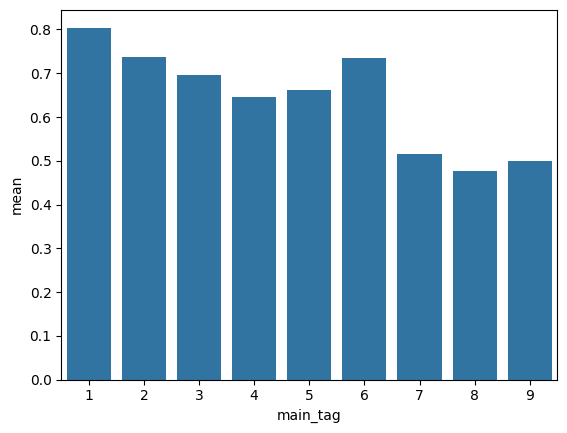

In [6]:
sns.barplot(df.groupby("main_tag")["answerCode"].describe()["mean"])

In [7]:
sort_Ktag=df["KnowledgeTag"].unique()
sort_Ktag=sorted(sort_Ktag)
sort_Ktag

[23,
 24,
 25,
 26,
 30,
 31,
 32,
 78,
 116,
 117,
 121,
 162,
 163,
 164,
 169,
 192,
 202,
 307,
 308,
 309,
 331,
 332,
 334,
 339,
 342,
 346,
 351,
 355,
 360,
 363,
 365,
 371,
 373,
 374,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 405,
 407,
 409,
 411,
 417,
 419,
 425,
 426,
 427,
 428,
 429,
 431,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 451,
 452,
 454,
 455,
 456,
 457,
 458,
 459,
 461,
 464,
 465,
 471,
 475,
 481,
 547,
 551,
 554,
 559,
 574,
 586,
 587,
 588,
 589,
 590,
 592,
 593,
 594,
 595,
 596,
 598,
 599,
 600,
 601,
 602,
 603,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 614,
 615,
 616,
 618,
 623,
 624,
 625,
 626,
 627,
 628,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 770,
 971,
 972,
 974,
 975,
 1000,
 1002,
 1009,
 1010,
 1011,
 1107,
 1108,
 1110,
 1117,
 1120,
 1180,
 1181,
 1182,
 1183,
 1184,
 1185,
 1200,
 1201,
 1202,
 1203,
 1248,
 1249,
 1250,
 1251,
 1252,
 1253,
 125

In [8]:
sort_Ktag_set=list(map(lambda x:x//10,sort_Ktag))
sort_Ktag_dict=dict(zip(sort_Ktag,sort_Ktag_set))

In [9]:
df["KTag_1"]=df["KnowledgeTag"].apply(lambda x:sort_Ktag_dict[x])

In [10]:
df.groupby("KTag_1")["answerCode"].mean()

KTag_1
2       0.627413
3       0.597561
7       0.579882
11      0.501370
12      0.544218
          ...   
1123    0.611570
1124    0.753086
1125    0.669884
1126    0.577508
1127    0.487179
Name: answerCode, Length: 274, dtype: float64

<Axes: xlabel='KTag_1', ylabel='answerCode'>

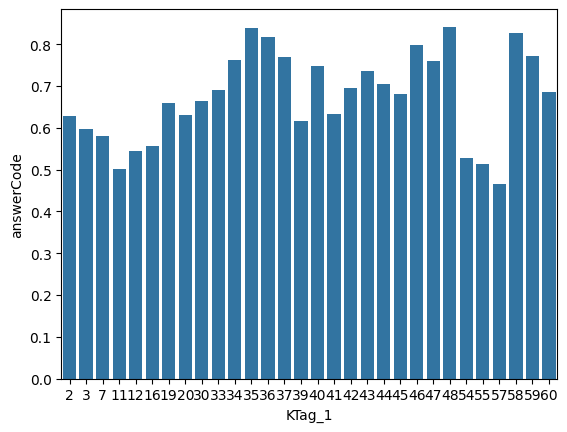

In [11]:
sns.barplot(df.groupby("KTag_1")["answerCode"].mean()[:30])

<Axes: xlabel='KTag_1', ylabel='answerCode'>

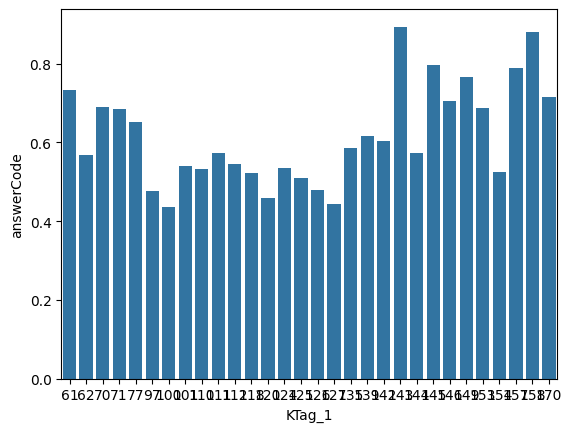

In [12]:
sns.barplot(df.groupby("KTag_1")["answerCode"].mean()[30:60])

In [13]:
df["KnowledgeTag"]=df["KnowledgeTag"]//10

In [14]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,main_tag,KTag_1
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,262,5,262
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,262,5,262
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,262,5,262
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,262,5,262
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,262,5,262
...,...,...,...,...,...,...,...,...
260109,7439,A040130001,A040000130,0,2020-10-14 23:07:23,883,4,883
260110,7439,A040130002,A040000130,1,2020-10-14 23:07:41,883,4,883
260111,7439,A040130003,A040000130,1,2020-10-14 23:08:02,824,4,824
260112,7439,A040130004,A040000130,1,2020-10-14 23:09:31,824,4,824


In [15]:
before_id=0
first_ind=0
ind=0
session_time=[]
for i in df["testId"]:
    if before_id != 0:
        if before_id == i:
            before_id = i
        else:
            session_time.append([first_ind,ind-1,i])
            first_ind=ind
            before_id = i
    else:
        before_id = i
    
    ind += 1

print(session_time)



[[0, 6, 'A050000027'], [7, 13, 'A050000037'], [14, 20, 'A050000039'], [21, 27, 'A050000046'], [28, 34, 'A020000027'], [35, 40, 'A020000028'], [41, 45, 'A020000029'], [46, 50, 'A020000030'], [51, 56, 'A020000025'], [57, 63, 'A020000031'], [64, 69, 'A020000032'], [70, 75, 'A020000033'], [76, 81, 'A020000034'], [82, 87, 'A020000036'], [88, 95, 'A020000026'], [96, 97, 'A020000035'], [98, 103, 'A050000087'], [104, 110, 'A020000056'], [111, 116, 'A020000057'], [117, 122, 'A020000055'], [123, 128, 'A050000044'], [129, 135, 'A050000046'], [136, 142, 'A020000058'], [143, 148, 'A020000059'], [149, 154, 'A050000012'], [155, 159, 'A050000050'], [160, 166, 'A050000013'], [167, 171, 'A020000005'], [172, 176, 'A050000014'], [177, 182, 'A020000007'], [183, 187, 'A050000004'], [188, 194, 'A020000011'], [195, 199, 'A050000006'], [200, 206, 'A020000001'], [207, 211, 'A020000013'], [212, 216, 'A050000010'], [217, 223, 'A020000015'], [224, 228, 'A020000017'], [229, 233, 'A050000029'], [234, 239, 'A05000000

In [22]:
import datetime as dt
from dateutil.parser import parse

#dt.datetime(df["Timestamp"][1])
session_time_list=np.array([])
for i in session_time:
    s=i[0]
    e=i[1]
    sec=((parse(df["Timestamp"][e])-parse(df["Timestamp"][s])).seconds)/60
    session_time_list=np.append(session_time_list,sec)

session_time_list


array([ 2.66666667, 10.33333333, 25.95      , ...,  1.05      ,
        1.53333333,  4.65      ])

<Axes: ylabel='Count'>

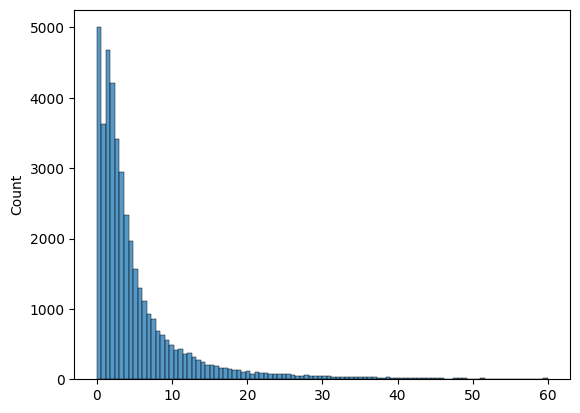

In [37]:
sns.histplot(session_time_list,bins=100,binrange=[0,60])

In [36]:
session_time_list

array([ 2.66666667, 10.33333333, 25.95      , ...,  1.05      ,
        1.53333333,  4.65      ])

In [24]:
session_time[29]

[177, 182, 'A020000007']